# Import Librarries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nyse/prices-split-adjusted.csv
/kaggle/input/nyse/fundamentals.csv
/kaggle/input/nyse/prices.csv
/kaggle/input/nyse/securities.csv


In [2]:

import math

import sklearn

import sklearn.preprocessing

import datetime

import os

import matplotlib.pyplot as plt

import tensorflow as tf


In [3]:

# split data in 70%/15%/15% train/validation/test sets
valid_set_size_percentage = 15 

test_set_size_percentage = 15 


In [4]:
#display parent directory and working directory

In [5]:
print(os.path.dirname(os.getcwd())+':', os.listdir(os.path.dirname(os.getcwd())));

/kaggle: ['lib', 'input', 'working']


In [6]:
print(os.getcwd()+':', os.listdir(os.getcwd()));

/kaggle/working: ['__notebook_source__.ipynb']


In [7]:
# import all stock prices 
df = pd.read_csv("../input/nyse/prices-split-adjusted.csv", index_col = 0)


In [8]:
df.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  851264 non-null  object 
 1   open    851264 non-null  float64
 2   close   851264 non-null  float64
 3   low     851264 non-null  float64
 4   high    851264 non-null  float64
 5   volume  851264 non-null  float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB


In [10]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [11]:
# number of different stocks
print('\nnumber of different stocks: ', len(list(set(df.symbol))))



number of different stocks:  501


In [12]:
print(list(set(df.symbol))[:10])

['SE', 'EMN', 'LLTC', 'IPG', 'BCR', 'FL', 'OXY', 'AMGN', 'NTAP', 'CAH']


In [13]:
df.tail()

,symbol,open,close,low,high,volume
date,,,,,,
2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0
2016-12-30,FTV,54.200001,53.630001,53.389999,54.480000,705100.0


# Visulize the Data

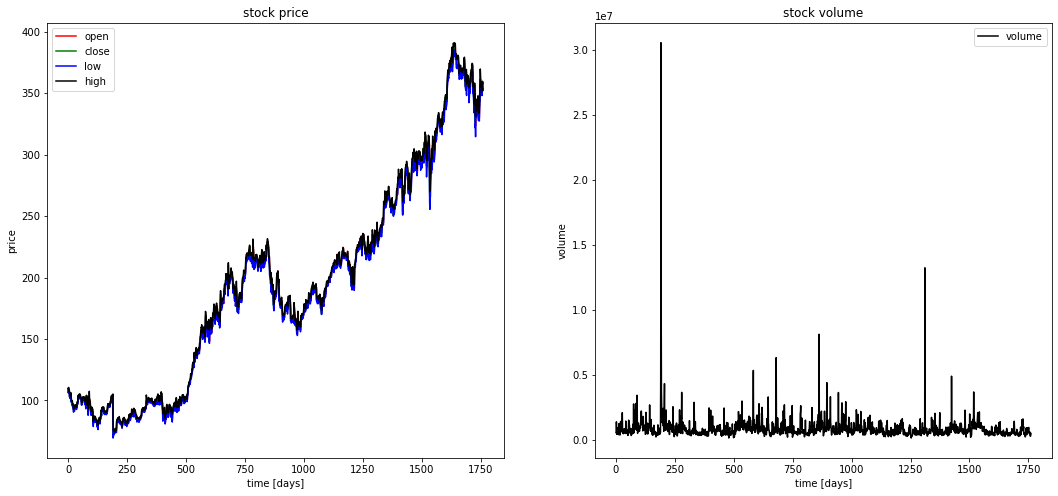

In [14]:
plt.figure(figsize=(18, 8));

plt.subplot(1,2,1);

plt.plot(df[df.symbol == 'EQIX'].open.values, color='red', label='open')

plt.plot(df[df.symbol == 'EQIX'].close.values, color='green', label='close')

plt.plot(df[df.symbol == 'EQIX'].low.values, color='blue', label='low')

plt.plot(df[df.symbol == 'EQIX'].high.values, color='black', label='high')

plt.title('stock price')

plt.xlabel('time [days]')

plt.ylabel('price')

plt.legend(loc='best')




plt.subplot(1,2,2);

plt.plot(df[df.symbol == 'EQIX'].volume.values, color='black', label='volume')

plt.title('stock volume')

plt.xlabel('time [days]')

plt.ylabel('volume')

plt.legend(loc='best');

In [15]:
# function for min-max normalization of stock

def normalize_data(df):
    
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    
    df['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    
    df['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    
    df['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    
    df['close'] = min_max_scaler.fit_transform(df['close'].values.reshape(-1,1))
    
    return df

In [16]:
# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    
    data_raw = stock.values # convert to numpy array
    
    data = []
    
    # create all possible sequences of length seq_len
    
    for index in range(len(data_raw) - seq_len): 
        
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]


In [17]:
# choose one stock
df_stock = df[df.symbol == 'EQIX'].copy()

df_stock.drop(['symbol'],1,inplace=True)

df_stock.drop(['volume'],1,inplace=True)


In [18]:
cols = list(df_stock.columns.values)

print('df_stock.columns.values = ', cols)

df_stock.columns.values =  ['open', 'close', 'low', 'high']


In [19]:
# normalize stock
df_stock_norm = df_stock.copy()

df_stock_norm = normalize_data(df_stock_norm)


In [20]:


# create train, test data
seq_len = 20 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)

print('x_train.shape = ',x_train.shape)

print('y_train.shape = ', y_train.shape)

print('x_valid.shape = ',x_valid.shape)

print('y_valid.shape = ', y_valid.shape)

print('x_test.shape = ', x_test.shape)

print('y_test.shape = ',y_test.shape)

x_train.shape =  (1220, 19, 4)
y_train.shape =  (1220, 4)
x_valid.shape =  (261, 19, 4)
y_valid.shape =  (261, 4)
x_test.shape =  (261, 19, 4)
y_test.shape =  (261, 4)


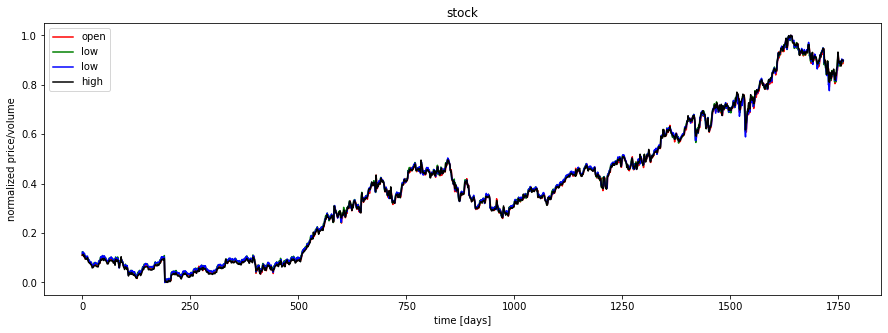

In [21]:
plt.figure(figsize=(15, 5));
plt.plot(df_stock_norm.open.values, color='red', label='open')
plt.plot(df_stock_norm.close.values, color='green', label='low')
plt.plot(df_stock_norm.low.values, color='blue', label='low')
plt.plot(df_stock_norm.high.values, color='black', label='high')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()


In [22]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import time 

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense,Activation, Dropout

from tensorflow.keras.layers import LSTM

# Predict SPecfic stock price data

In [23]:
df=pd.read_csv('../input/nyse/prices-split-adjusted.csv')

In [24]:
data=df.copy()

In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
open,851264.0,6.499362e+01,7.520389e+01,1.66,3.127000e+01,4.846000e+01,7.512000e+01,1.584440e+03
close,851264.0,6.501191e+01,7.520122e+01,1.59,3.129278e+01,4.848000e+01,7.514000e+01,1.578130e+03
low,851264.0,6.433654e+01,7.445952e+01,1.50,3.094000e+01,4.797000e+01,7.440000e+01,1.549940e+03
high,851264.0,6.563975e+01,7.590686e+01,1.81,3.162000e+01,4.896000e+01,7.585000e+01,1.600930e+03
volume,851264.0,5.415113e+06,1.249468e+07,0.00,1.221500e+06,2.476250e+06,5.222500e+06,8.596434e+08


In [26]:
data.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [27]:
data.dtypes

date       object
symbol     object
open      float64
close     float64
low       float64
high      float64
volume    float64
dtype: object

In [28]:
data.tail(5)

,date,symbol,open,close,low,high,volume
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0
851263,2016-12-30,FTV,54.200001,53.630001,53.389999,54.480000,705100.0


In [29]:
# choose one stock
stock_data = data[data.symbol == 'ZTS'].copy()

In [30]:
stock=stock_data.reset_index()['close']

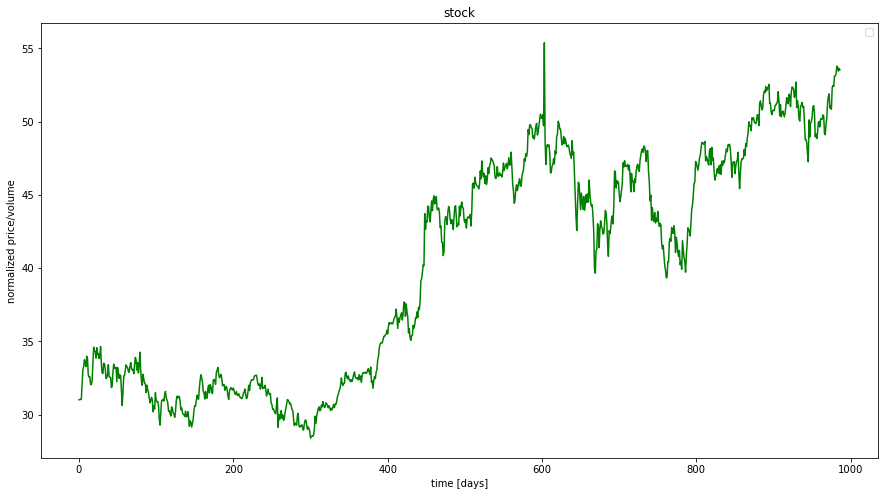

In [31]:
plt.figure(figsize=(15, 8));
plt.plot(stock,color='g')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

In [50]:
scale=MinMaxScaler(feature_range=(0,1))

stock_scale=scale.fit_transform(np.array(stock).reshape(-1,1))

In [33]:
print(stock_scale)

[[0.09673832]
 [0.09710897]
 [0.09785029]
 [0.09747965]
 [0.13343217]
 [0.17234985]
 [0.18013335]
 [0.19792446]
 [0.19088209]
 [0.18050407]
 [0.20681986]
 [0.20163083]
 [0.16011864]
 [0.15418832]
 [0.15530022]
 [0.13602668]
 [0.13491478]
 [0.1452928 ]
 [0.18717572]
 [0.22979977]
 [0.22053365]
 [0.21830989]
 [0.2020014 ]
 [0.2283173 ]
 [0.21089695]
 [0.21423276]
 [0.20088954]
 [0.20756115]
 [0.23128239]
 [0.186805  ]
 [0.16456634]
 [0.16308372]
 [0.18939947]
 [0.18791701]
 [0.17494436]
 [0.1504818 ]
 [0.15233498]
 [0.16085996]
 [0.18532253]
 [0.15530022]
 [0.1538176 ]
 [0.15307631]
 [0.12750185]
 [0.13194955]
 [0.16753142]
 [0.186805  ]
 [0.17605641]
 [0.17642698]
 [0.17902149]
 [0.14232772]
 [0.17828016]
 [0.16641953]
 [0.15085251]
 [0.15974792]
 [0.15789473]
 [0.12231286]
 [0.08228321]
 [0.11675311]
 [0.1571534 ]
 [0.15789473]
 [0.17123795]
 [0.18495177]
 [0.18087468]
 [0.17828016]
 [0.16827275]
 [0.16604896]
 [0.18013335]
 [0.19088209]
 [0.17716827]
 [0.17197927]
 [0.17346189]
 [0.16

In [34]:
##splitting dataset into train and test split
training_size=int(len(stock_scale)*0.80)

test_size=len(stock_scale)-training_size

train_data,test_data=stock_scale[0:training_size,:],stock_scale[training_size:len(stock_scale),:1]

In [35]:
test_size

198

In [36]:
train_data

array([[0.09673832],
       [0.09710897],
       [0.09785029],
       [0.09747965],
       [0.13343217],
       [0.17234985],
       [0.18013335],
       [0.19792446],
       [0.19088209],
       [0.18050407],
       [0.20681986],
       [0.20163083],
       [0.16011864],
       [0.15418832],
       [0.15530022],
       [0.13602668],
       [0.13491478],
       [0.1452928 ],
       [0.18717572],
       [0.22979977],
       [0.22053365],
       [0.21830989],
       [0.2020014 ],
       [0.2283173 ],
       [0.21089695],
       [0.21423276],
       [0.20088954],
       [0.20756115],
       [0.23128239],
       [0.186805  ],
       [0.16456634],
       [0.16308372],
       [0.18939947],
       [0.18791701],
       [0.17494436],
       [0.1504818 ],
       [0.15233498],
       [0.16085996],
       [0.18532253],
       [0.15530022],
       [0.1538176 ],
       [0.15307631],
       [0.12750185],
       [0.13194955],
       [0.16753142],
       [0.186805  ],
       [0.17605641],
       [0.176

In [37]:
import numpy 

In [38]:
def create_dataset(dataset,step=1):
    
    X, Y = [], []
    
    for i in range(len(dataset)-step-1):
        
        a = dataset[i:(i+step), 0]   ###i=0, 0,1,2,3-----99   100 
        X.append(a)
        
        Y.append(dataset[i + step, 0])
        
    return numpy.array(X), numpy.array(Y)

In [39]:
time_step = 100

X_train, y_train = create_dataset(train_data, time_step)

X_test, ytest = create_dataset(test_data, time_step)

In [40]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)

X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [41]:
X_test

array([[[0.53187544],
        [0.52779831],
        [0.52186803],
        ...,
        [0.83506298],
        [0.86767977],
        [0.8773165 ]],

       [[0.52779831],
        [0.52186803],
        [0.51074868],
        ...,
        [0.86767977],
        [0.8773165 ],
        [0.87398069]],

       [[0.52186803],
        [0.51074868],
        [0.54558927],
        ...,
        [0.8773165 ],
        [0.87398069],
        [0.88880653]],

       ...,

       [[0.85285393],
        [0.8409933 ],
        [0.83024456],
        ...,
        [0.91623418],
        [0.92142317],
        [0.94069674]],

       [[0.8409933 ],
        [0.83024456],
        [0.83506298],
        ...,
        [0.92142317],
        [0.94069674],
        [0.93847295]],

       [[0.83024456],
        [0.83506298],
        [0.86767977],
        ...,
        [0.94069674],
        [0.93847295],
        [0.92809481]]])

In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split

In [43]:
model=Sequential()

model.add(LSTM(100,return_sequences=True,input_shape=(100,1)))

model.add(LSTM(100,return_sequences=True))

model.add(LSTM(50))

model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 100)          40800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 100)          80400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 151,451
Trainable params: 151,451
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.fit(X_train,y_train,
          validation_data=(X_test,ytest),
          epochs=10,batch_size=64,
          verbose=1)

Epoch 1/10
11/11 [==============================] - 11s 464ms/step - loss: 0.0687 - val_loss: 0.0698
Epoch 2/10
11/11 [==============================] - 3s 291ms/step - loss: 0.0092 - val_loss: 0.0103
Epoch 3/10
11/11 [==============================] - 3s 278ms/step - loss: 0.0044 - val_loss: 0.0026
Epoch 4/10
11/11 [==============================] - 3s 275ms/step - loss: 0.0038 - val_loss: 0.0054
Epoch 5/10
11/11 [==============================] - 3s 282ms/step - loss: 0.0031 - val_loss: 0.0067
Epoch 6/10
11/11 [==============================] - 3s 287ms/step - loss: 0.0028 - val_loss: 0.0051
Epoch 7/10
11/11 [==============================] - 3s 278ms/step - loss: 0.0026 - val_loss: 0.0032
Epoch 8/10
11/11 [==============================] - 3s 280ms/step - loss: 0.0026 - val_loss: 0.0041
Epoch 9/10
11/11 [==============================] - 3s 280ms/step - loss: 0.0025 - val_loss: 0.0031
Epoch 10/10
11/11 [==============================] - 3s 287ms/step - loss: 0.0026 - val_loss: 0.002

In [46]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)

test_predict=model.predict(X_test)

In [47]:
train_predict.shape

(688, 1)

In [48]:
test_predict.shape

(97, 1)

In [54]:
##Transformback to original form
train_predict=scale.inverse_transform(train_predict)

test_predict=scale.inverse_transform(test_predict)

In [55]:
## Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

39.10209054588929

In [56]:
## Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

49.42801387201633

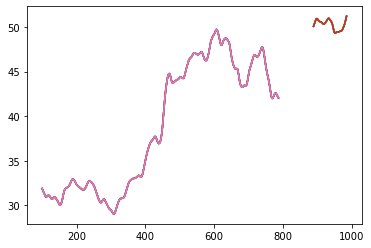

In [57]:
## Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(stock_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(stock_data)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(stock_data)-1, :] = test_predict
# plot baseline and predictions
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()